In [1]:
import matplotlib
# matplotlib.use("TkAgg")
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from matplotlib import pyplot as plt
import numpy as np
import os
import random
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
noisy_imgs_path = 'Noisy_Documents/noisy/'
clean_imgs_path = 'Noisy_Documents/clean/'

In [3]:
X_train_noisy = []
X_train_clean = []

In [4]:
for file in sorted(os.listdir(noisy_imgs_path)):
    img = load_img(noisy_imgs_path+file, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_noisy.append(img)

In [5]:
for file in sorted(os.listdir(clean_imgs_path)):
    img = load_img(clean_imgs_path+file, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_clean.append(img)

In [6]:
X_train_noisy = np.array(X_train_noisy) 
X_train_clean = np.array(X_train_clean)

In [7]:
X_test_noisy = X_train_noisy[0:20,]
X_train_noisy = X_train_noisy[21:,]

In [8]:
X_test_clean = X_train_clean[0:20,]
X_train_clean = X_train_clean[21:,]

In [9]:
conv_autoencoder = Sequential()
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(420,540,1), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [15]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

Epoch 1/10
195/195 [==============================] - 74s 379ms/step - loss: 0.3643
Epoch 2/10
195/195 [==============================] - 63s 323ms/step - loss: 0.3006
Epoch 3/10
195/195 [==============================] - 61s 313ms/step - loss: 0.2789
Epoch 4/10
195/195 [==============================] - 62s 317ms/step - loss: 0.2504
Epoch 5/10
195/195 [==============================] - 67s 341ms/step - loss: 0.2109
Epoch 6/10
195/195 [==============================] - 66s 338ms/step - loss: 0.1740
Epoch 7/10
195/195 [==============================] - 65s 333ms/step - loss: 0.1545
Epoch 8/10
195/195 [==============================] - 60s 307ms/step - loss: 0.1425
Epoch 9/10
195/195 [==============================] - 60s 307ms/step - loss: 0.1321
Epoch 10/10
195/195 [==============================] - 60s 308ms/step - loss: 0.1237


In [16]:
output = conv_autoencoder.predict(X_test_noisy)

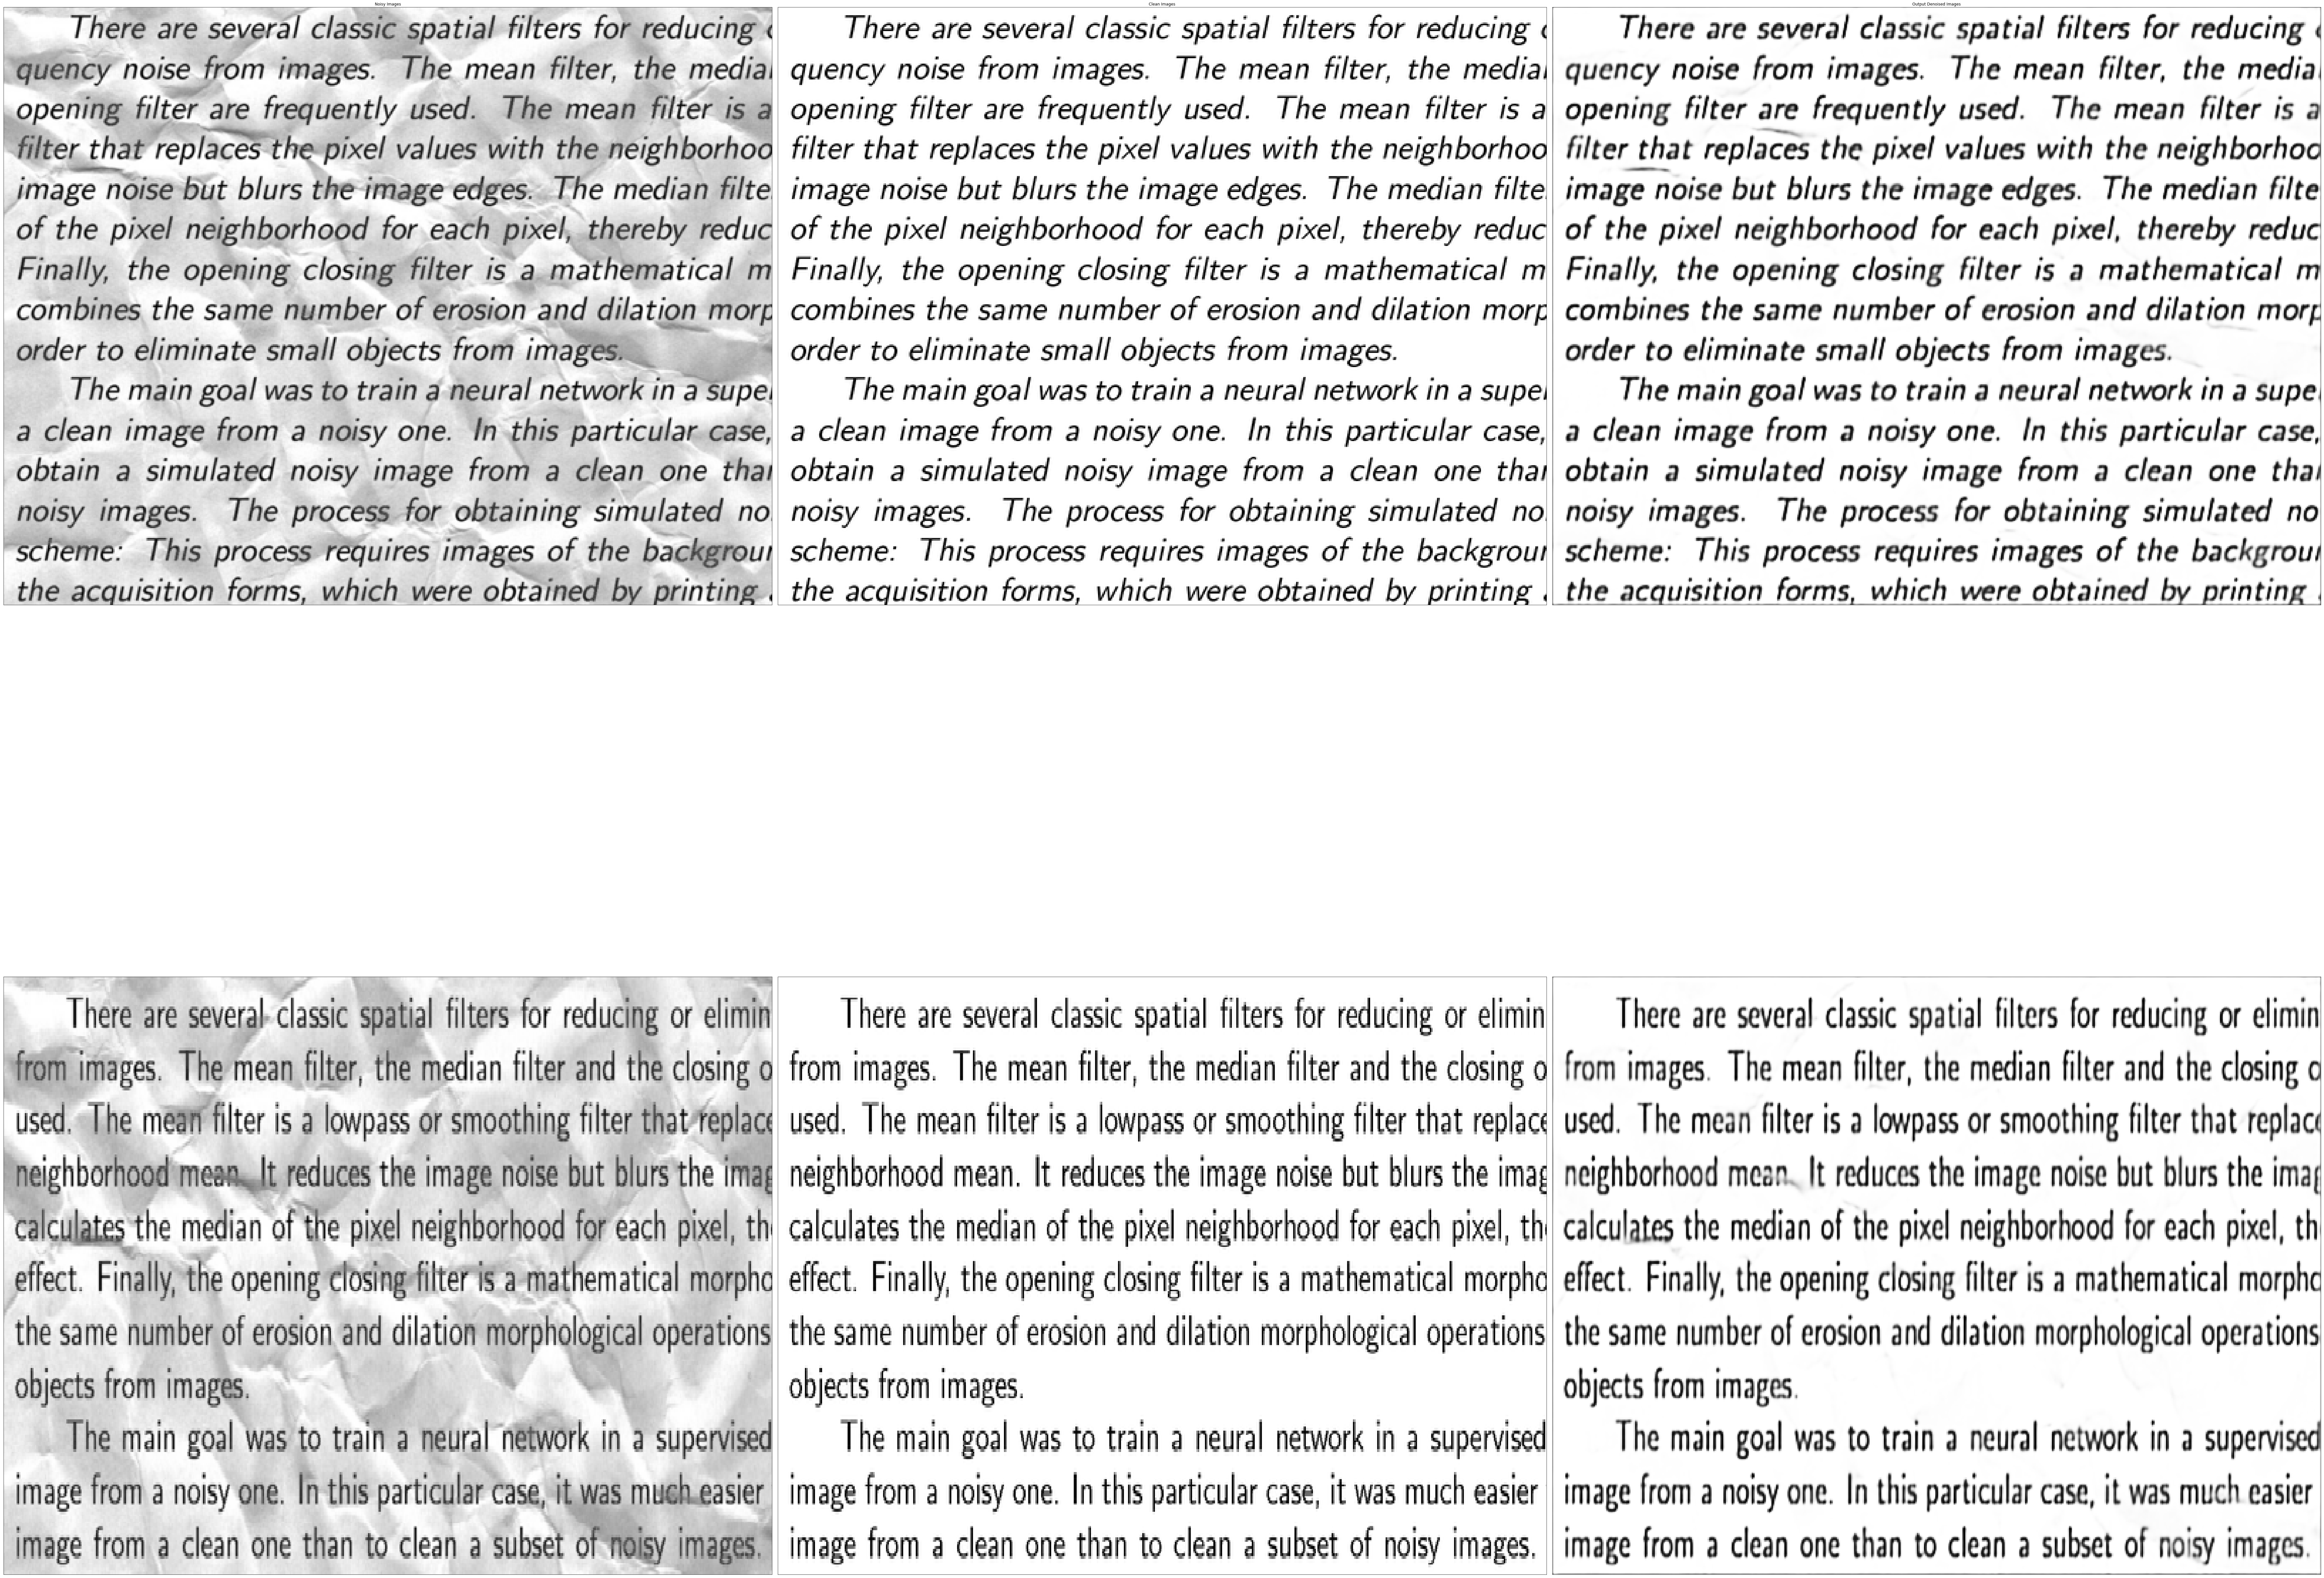

In [17]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)
for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoised Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.rcParams["figure.figsize"] = [100,100]
plt.tight_layout()
plt.show()